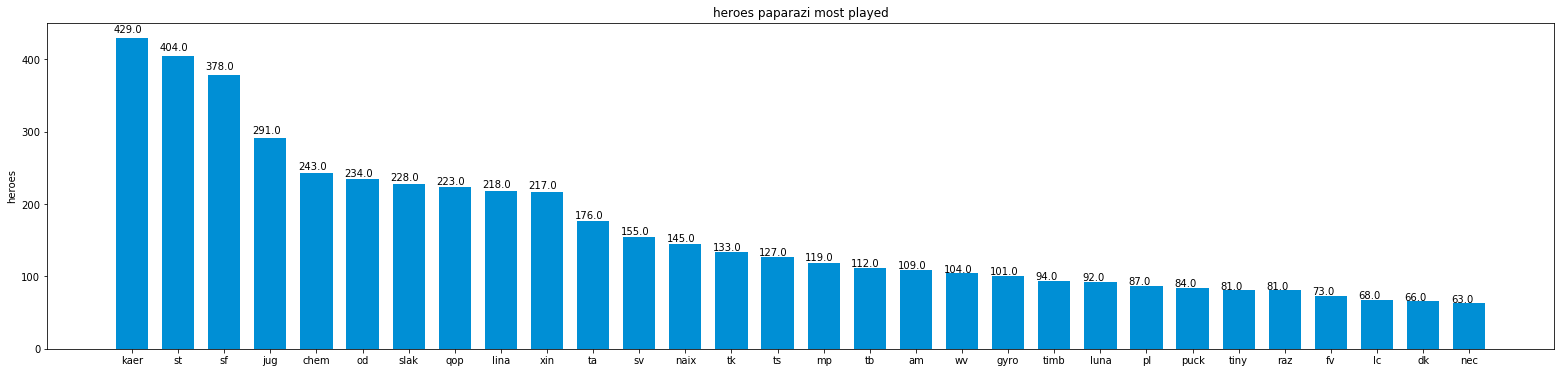

In [78]:
#常用英雄统计
import pandas as pd
import matplotlib.pyplot as plt
import pymongo
data = pd.read_csv('data.csv')
df = pd.DataFrame(data)
hero = df['hero_id'].value_counts()
most_played = hero[:30]

con = pymongo.MongoClient('127.0.0.1:27017')
h = con.dota.hero
names = []
for i in most_played.index:
    name = h.find({'hero_id':int(i)})[0]
    #print(name['short_name'])
    names.append(name['short_name'])

fig=plt.figure(figsize=(27,6))
ax1=plt.subplot(111)
x_zhou = pd.Series(names)
rect = ax1.bar(x_zhou.index,most_played.values,0.7,color='#008FD5')
for rec in rect:#条形图上显示数据标签
    x=rec.get_x()
    height=rec.get_height()
    ax1.text(x-0.05,1.02*height,str(height))
ax1.set_xticks(x_zhou.index)
ax1.set_xticklabels(x_zhou.values)
ax1.set_ylabel("times")
ax1.set_xlabel("heroes")
ax1.set_title("heroes paparazi most played")
plt.show()


In [ ]:
con = pymongo.MongoClient('127.0.0.1:27017')#通过数据库查找把英雄id和英雄名称对应起来
h = con.dota.hero
names = []
for i in win.index:
    name = h.find({'hero_id':int(i)})[0]
    #print(name['short_name'])
    names.append(name['short_name'])

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import pymongo
data = pd.read_csv('data.csv')
df = pd.DataFrame(data)
hero = df['hero_id'].value_counts()
most_played = hero[:30]
a = {}#字典记录常用英雄的胜场，默认为{int(hero_id):0，int(hero_id):0，int(hero_id):0.....}
for i in most_played.index:
    a[i]=0
    
for i in df.index:
    win = 0
    for j in most_played.index:
        if df.loc[i].hero_id == j:
            if df.loc[i].is_win == True:
                a[j]+=1
b =dict(most_played)#常玩的30个英雄
c ={}
for i in b:
    c[i]=a[i]/b[i]#a[i]/b[i]为id为i的英雄胜率
win = pd.Series(c)



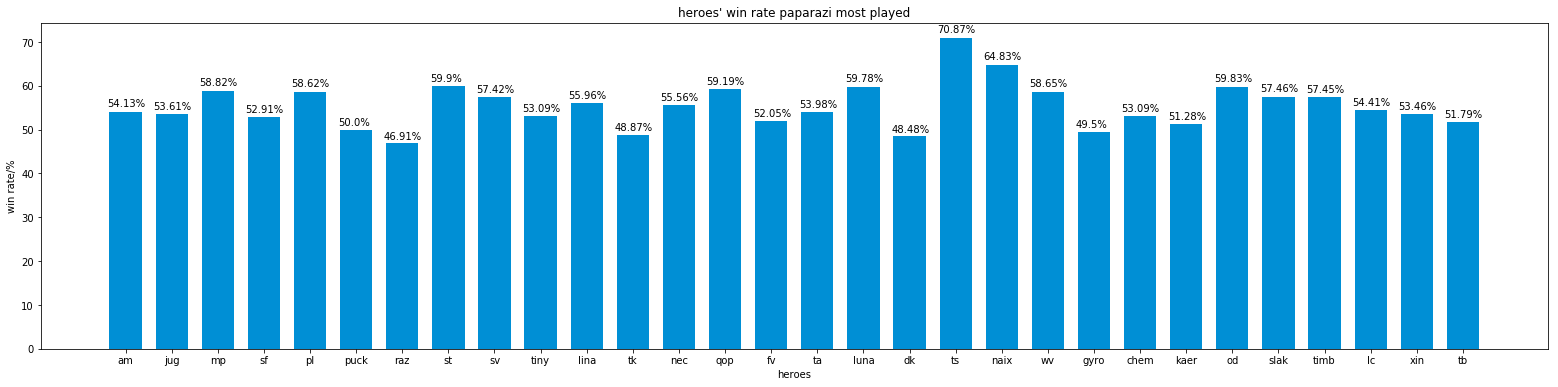

In [79]:
win_rate=pd.Series(win.values,names)
fig=plt.figure(figsize=(27,6))
ax1=plt.subplot(111)
x_zhou = pd.Series(names)
rect = ax1.bar(x_zhou.index,win_rate.values*100,0.7,color='#008FD5')
for rec in rect:#条形图上显示数据标签
    x=rec.get_x()
    height=rec.get_height()
    r = round(height,2)
    ax1.text(x-0.05,1.02*height,str('{}%'.format(r)))
ax1.set_xticks(x_zhou.index)
ax1.set_xticklabels(x_zhou.values)
ax1.set_ylabel("win rate/%")
ax1.set_xlabel("heroes")
ax1.set_title("heroes' win rate paparazi most played")
plt.show()